In [1]:
import pandas as pd

df = pd.read_csv("../../NewDataset.csv")
df

,Profile Pic,Nums/Length Username,Full Name Words,Bio Length,External Url,Verified,Business,#Posts,#Followers,#Following,Last Post Recent,%Post Single Day,Index of Activity,Average of Likes,Fake,Profile Pic Url,Username
0,1,0.000,2,42,1,0,0,111,688,409,1,3.000,11.111,68.300,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,matteo_cattani_
1,1,0.067,2,0,0,0,0,58,353,456,1,8.621,0.800,31.121,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,gabrielebegani5
2,1,0.000,0,0,0,0,0,44,535,364,1,4.545,1.417,49.750,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,mattelazzari
3,1,0.000,2,14,0,0,1,81,3109,298,1,1.235,0.833,160.556,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,davidobrasil
4,1,0.000,2,0,0,0,1,498,1071,1999,1,2.000,5.333,95.400,0,https://scontent-mia3-2.cdninstagram.com/v/t51...,sofiazammarchi_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.308,1,0,0,0,0,0,87,4609,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,sardashti2233
996,1,0.000,3,75,0,0,0,1,103,159,0,100.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,_mxnsterz_backup
997,1,0.000,1,0,0,0,0,0,88,322,0,0.000,0.000,0.000,1,https://scontent-atl3-1.cdninstagram.com/v/t51...,rezysmods
998,0,0.000,1,0,0,0,0,0,929,1315,0,0.000,0.000,0.000,1,https://instagram.ffru6-1.fna.fbcdn.net/v/t51....,cravinforti_


In [2]:
X=df.iloc[:, 0:11].values
X

array([[1.000e+00, 0.000e+00, 2.000e+00, ..., 6.880e+02, 4.090e+02,
        1.000e+00],
       [1.000e+00, 6.700e-02, 2.000e+00, ..., 3.530e+02, 4.560e+02,
        1.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 5.350e+02, 3.640e+02,
        1.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 8.800e+01, 3.220e+02,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 9.290e+02, 1.315e+03,
        0.000e+00],
       [1.000e+00, 0.000e+00, 3.000e+00, ..., 2.300e+02, 2.239e+03,
        0.000e+00]])

In [3]:
y=df[['Fake']]
y

,Fake
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [4]:
from sklearn import preprocessing
X = preprocessing.normalize(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

670 670
330 330


In [6]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()

In [7]:
nb.fit(X_train, y_train.values.ravel()) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
print("TRAIN SET", nb.score(X_train, y_train))
print("TEST  SET", nb.score(X_test, y_test))

TRAIN SET 0.9014925373134328
TEST  SET 0.8939393939393939


In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(nb, X, y.values.ravel(), cv=4)
scores

array([0.568, 0.872, 0.904, 0.812])

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.26)


In [11]:
print("Errori in training set")
predictions = nb.predict(X_train)
for elem, prediction, label in zip(X_train, predictions, y_train):
  if prediction != label:
    print(elem, 'has been classified as ', prediction, 'and should be ', label) 

Errori in training set
[1.55243296e-04 3.44640116e-05 1.55243296e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.20973183e-03
 2.71675767e-02 9.99611581e-01 0.00000000e+00] has been classified as  1 and should be  Fake


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [13]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[161   4]
 [ 31 134]]


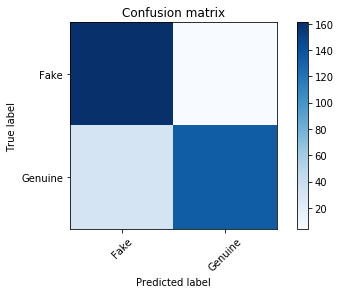

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, nb.predict(X_test))
print(cm)
plot_confusion_matrix(cm)

In [15]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)
    
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.02424242 1.        ]
True Positive rate:  [0.         0.81212121 1.        ]


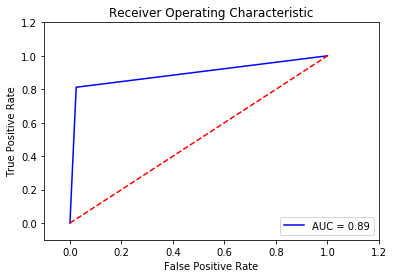

In [16]:
plot_roc_curve(y_test, nb.predict(X_test))

In [17]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       165
           1       0.97      0.81      0.88       165

    accuracy                           0.89       330
   macro avg       0.90      0.89      0.89       330
weighted avg       0.90      0.89      0.89       330

